In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, pearsonr
from statsmodels.stats.proportion import proportions_ztest



%matplotlib inline

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Shape of DataFrame
print("The data frame has {} rows and {} columns".format(data.shape[0],data.shape[1]))

The data frame has 1338 rows and 7 columns


In [6]:
#Datatype of Each Attribute
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
print("There are 4 numerical variables and 3 categorical variables")

There are 4 numerical variables and 3 categorical variables


In [6]:
#checking the presence of NULL values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
print("There are no missing variables that is there is no presence of NULL values")

There are no missing variables that is there is no presence of NULL values


In [9]:
# 5 number summary
pd.DataFrame(data.describe()).iloc[[1,3,7,4,5,6]]

,age,bmi,children,charges
mean,39.207025,30.663397,1.094918,13270.422265
min,18.000000,15.960000,0.000000,1121.873900
max,64.000000,53.130000,5.000000,63770.428010
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515


Text(0, 0.5, 'COUNT')

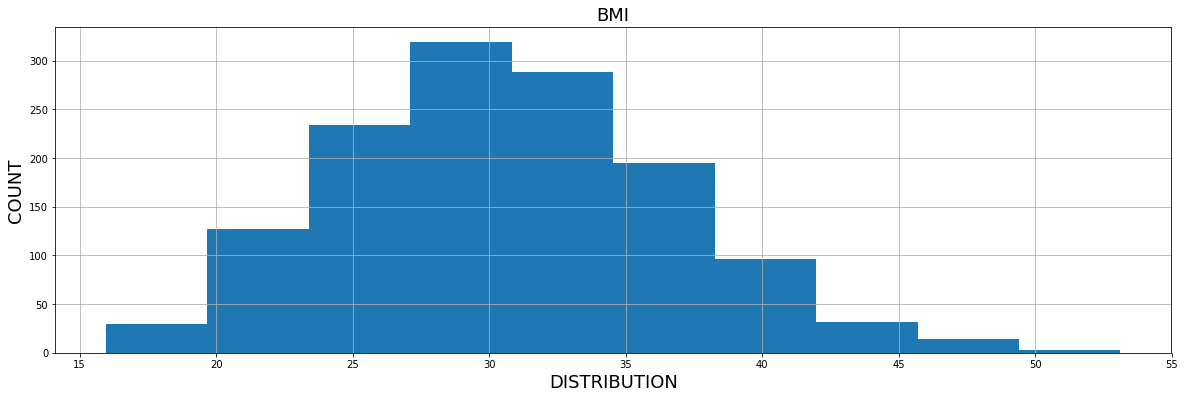

In [10]:
#Distribution of BMI,AGE,CHARGES
#AGE
rcParams['figure.figsize'] = 20, 6
data['bmi'].hist()
plt.title('BMI',fontsize=18)
plt.xlabel('DISTRIBUTION',fontsize=18)
plt.ylabel('COUNT',fontsize=18)

In [11]:
print("BMI is approximately normally distributed")

BMI is approximately normally distributed


Text(0, 0.5, 'COUNT')

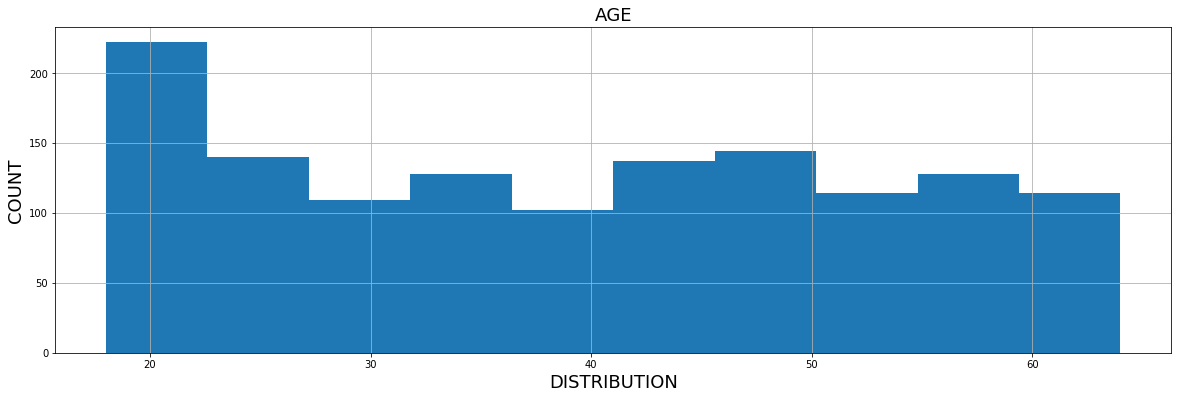

In [12]:
#AGE
rcParams['figure.figsize'] = 20, 6
data['age'].hist()
plt.title('AGE',fontsize=18)
plt.xlabel('DISTRIBUTION',fontsize=18)
plt.ylabel('COUNT',fontsize=18)

In [13]:
print("Age is not normally distributed")

Age is not normally distributed


Text(0, 0.5, 'COUNT')

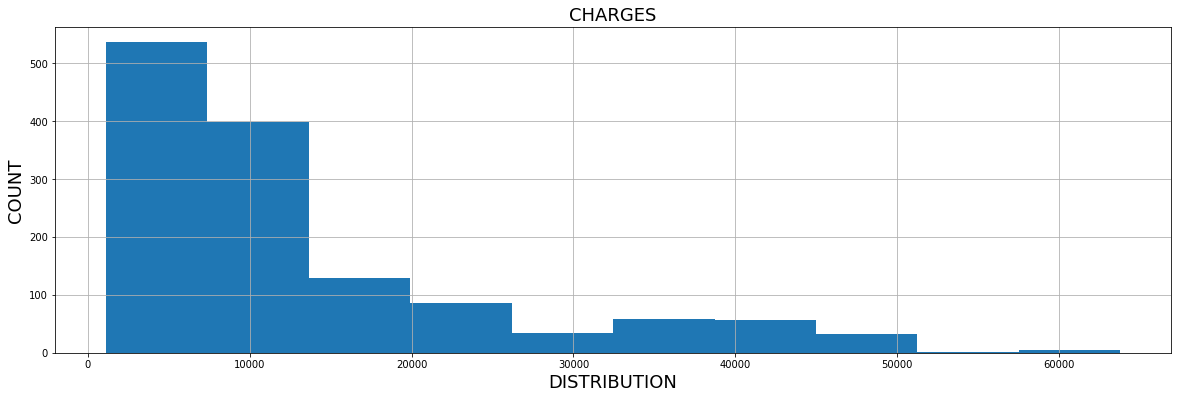

In [14]:
#CHARGES
rcParams['figure.figsize'] = 20, 6
data['charges'].hist()
plt.title('CHARGES',fontsize=18)
plt.xlabel('DISTRIBUTION',fontsize=18)
plt.ylabel('COUNT',fontsize=18)

In [15]:
print("Charges is right skewed")

Charges is right skewed


In [16]:
#Measure of Skewness
data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [18]:
#Outliers
#Values beyond 3 standard deviation is considered outliers in this example
bmi_mean, bmi_std = np.mean(data['bmi']), np.std(data['bmi'])
age_mean, age_std = np.mean(data['age']), np.std(data['age'])
charges_mean, charges_std = np.mean(data['charges']), np.std(data['charges'])
cut_off_bmi = bmi_std * 3
cut_off_age = age_std * 3
cut_off_charges = charges_std * 3
lower_bmi, upper_bmi = bmi_mean - cut_off_bmi, bmi_mean + cut_off_bmi
lower_age, upper_age = age_mean - cut_off_age, age_mean + cut_off_age
lower_charges, upper_charges = charges_mean - cut_off_charges, charges_mean + cut_off_charges

In [19]:
outliers_bmi = [x for x in data['bmi'] if x < lower_bmi or x > upper_bmi]
outliers_age = [x for x in data['age'] if x < lower_age or x > upper_age]
outliers_charges = [x for x in data['charges'] if x < lower_charges or x > upper_charges]

In [20]:
print("The number of outliers in BMI are:",len(outliers_bmi))
print("The number of outliers in Age are:",len(outliers_age))
print("The number of outliers in Charges are:",len(outliers_charges))

The number of outliers in BMI are: 4
The number of outliers in Age are: 0
The number of outliers in Charges are: 7


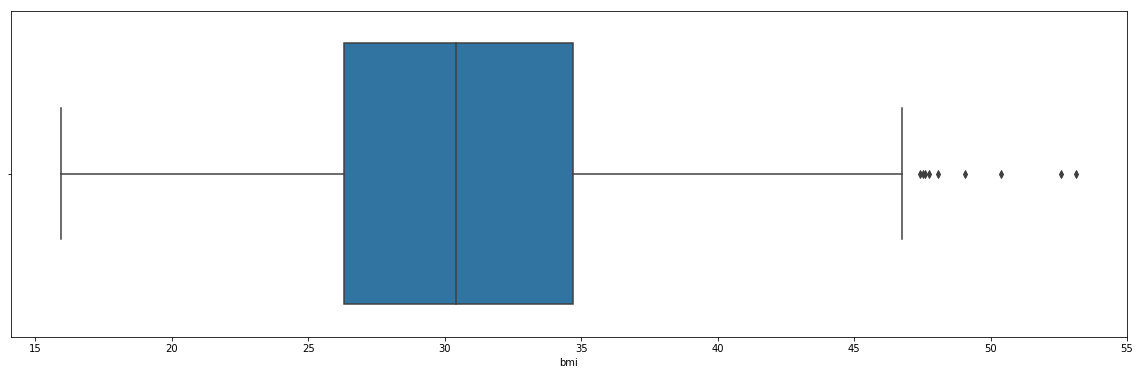

In [21]:
#outliers:BOX PLOT - BMI
sns.boxplot(x='bmi',data=data)
plt.show()

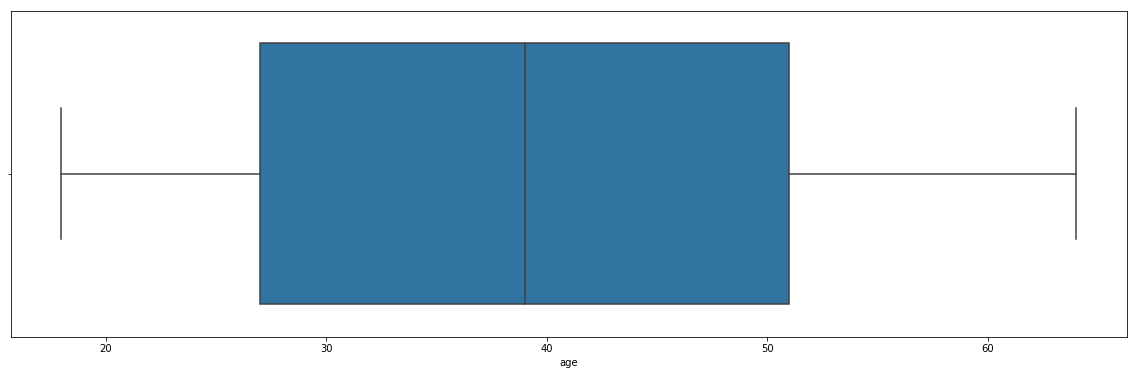

In [22]:
#outliers:BOX PLOT - Age
sns.boxplot(x='age',data=data)
plt.show()

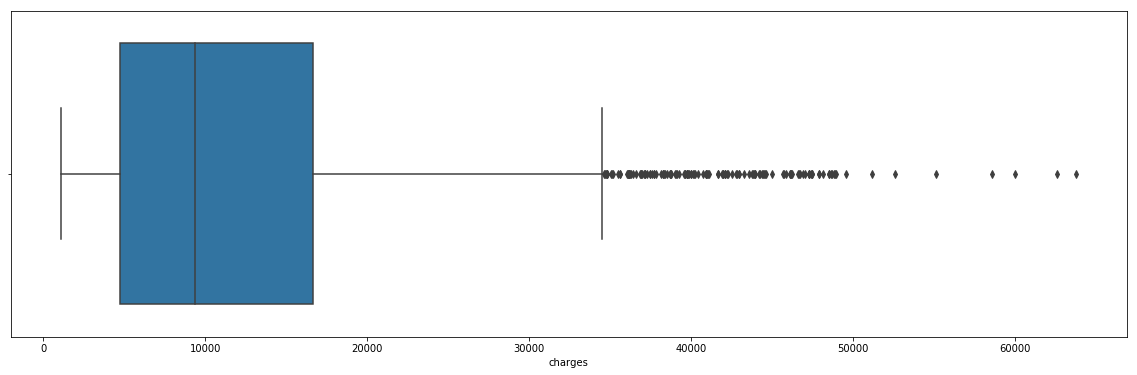

In [23]:
#outliers:BOX PLOT - charges
sns.boxplot(x='charges',data=data)
plt.show()

In [24]:
children_count = data.children.value_counts()

In [25]:
children = np.arange(0,len(children_count))

Text(0, 0.5, 'Count')

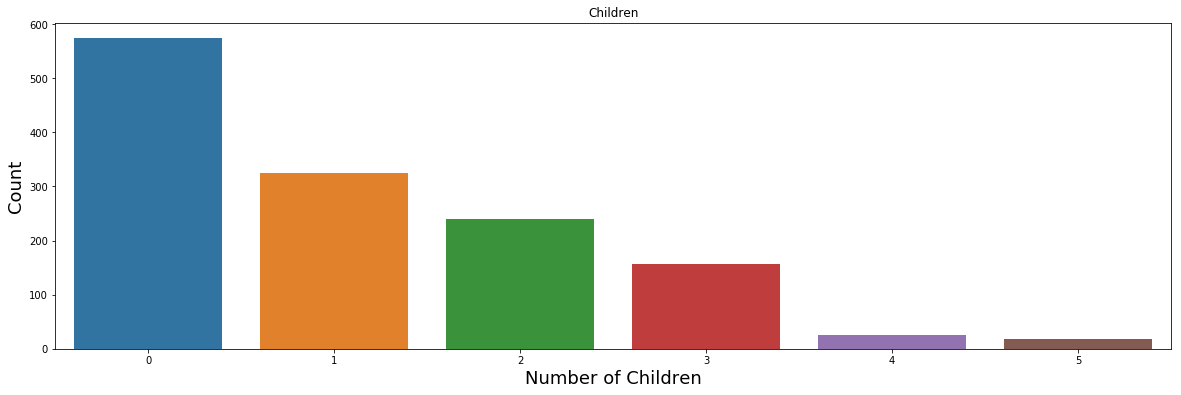

In [26]:
sns.barplot(x=children_count.index,y=children_count)
plt.title('Children')
plt.xlabel('Number of Children',fontsize=18)
plt.ylabel('Count',fontsize=18)

In [27]:
smoker_count = data['smoker'].value_counts()

In [28]:
smoker_count= smoker_count.reindex()

Text(0, 0.5, 'Count')

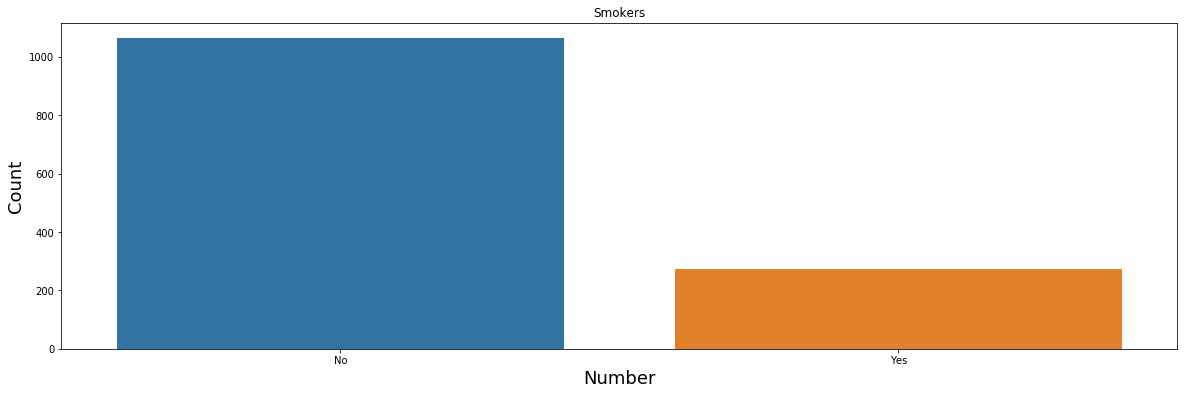

In [29]:
sns.barplot(x=['No','Yes'],y=smoker_count)
plt.title('Smokers')
plt.xlabel('Number',fontsize=18)
plt.ylabel('Count',fontsize=18)

In [30]:
count_region = data.region.value_counts()

In [31]:
count_region

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0, 0.5, 'Count')

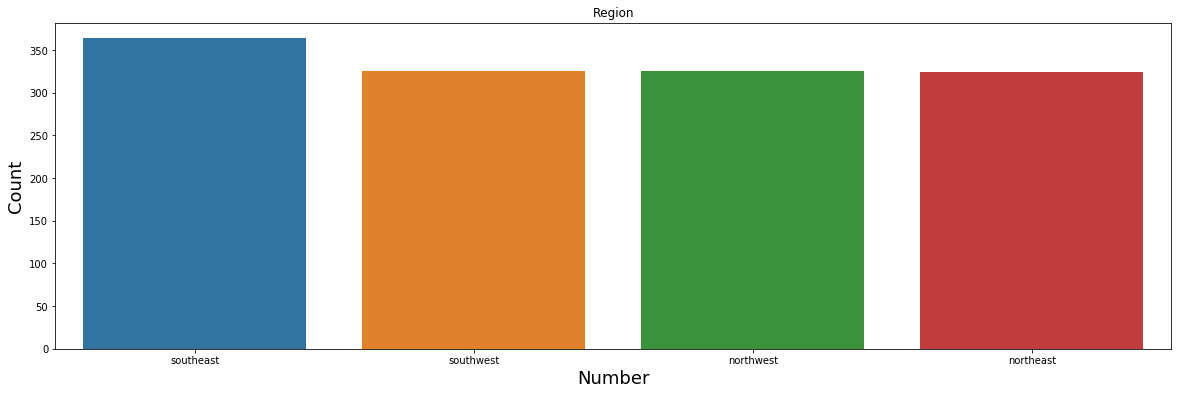

In [32]:
sns.barplot(x=count_region.index,y=count_region)
plt.title('Region')
plt.xlabel('Number',fontsize=18)
plt.ylabel('Count',fontsize=18)

In [33]:
count_sex = data.sex.value_counts()

Text(0, 0.5, 'Count')

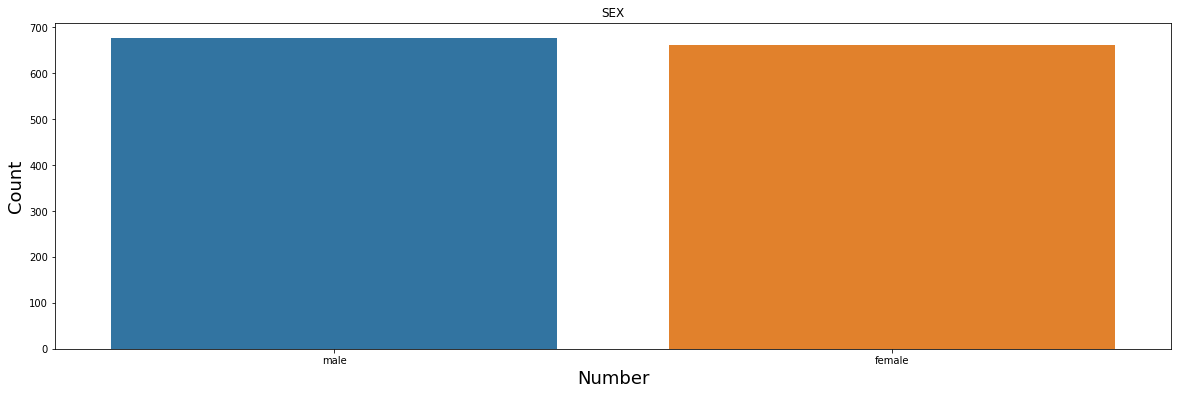

In [34]:
sns.barplot(x=count_sex.index,y=count_sex)
plt.title('SEX')
plt.xlabel('Number',fontsize=18)
plt.ylabel('Count',fontsize=18)

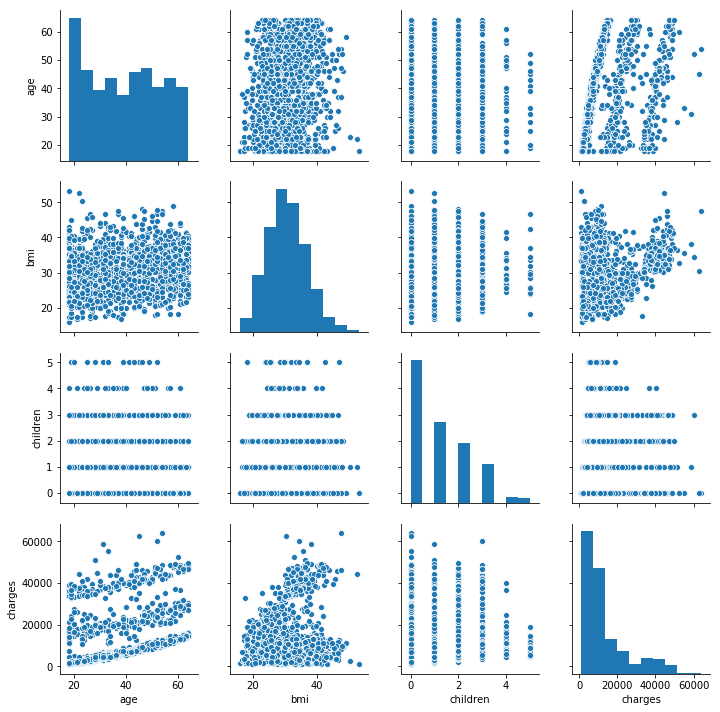

In [35]:
#pairplot of all the parameters
sns.pairplot(data)

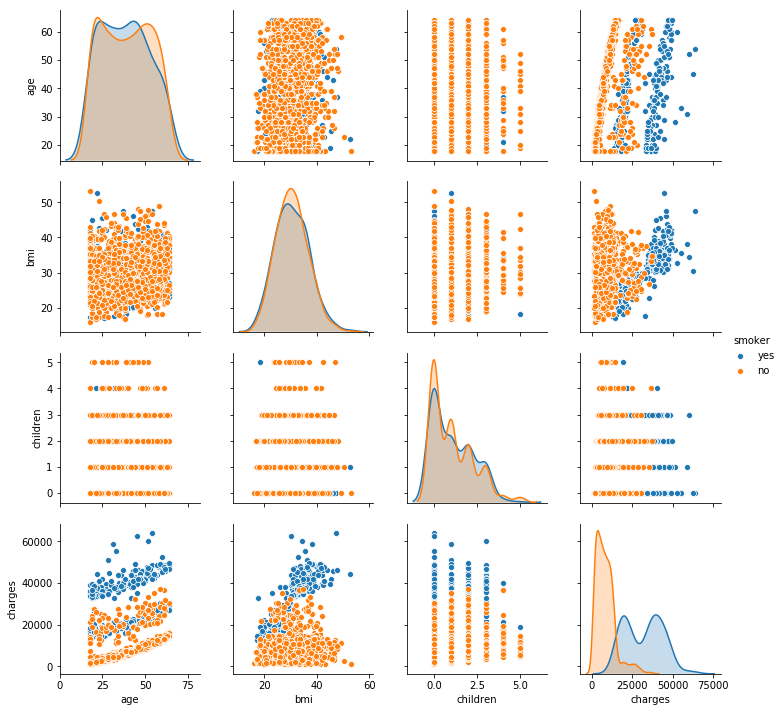

In [36]:
sns.pairplot(data,hue='smoker')
plt.show()

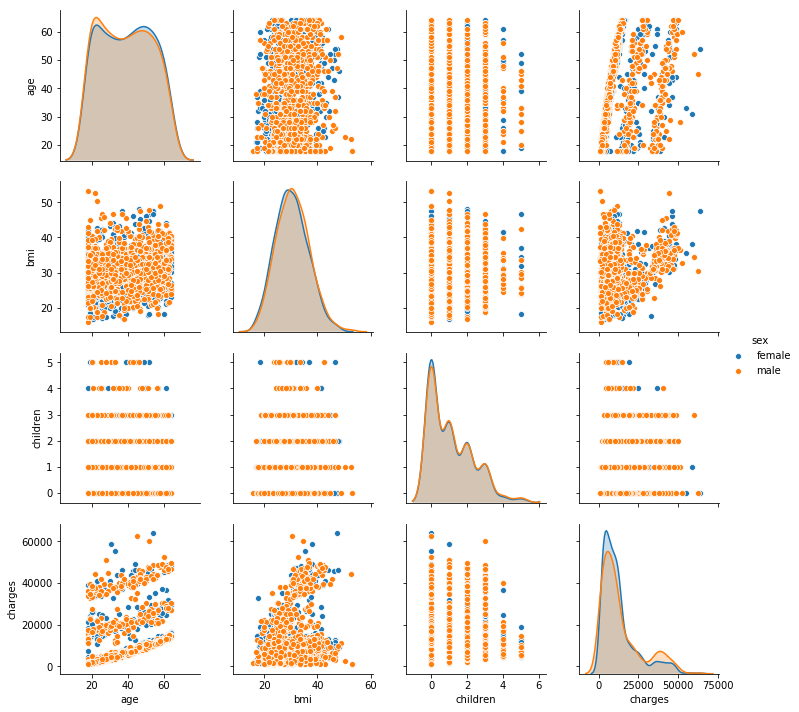

In [37]:
sns.pairplot(data,hue='sex')
plt.show()

In [38]:
#Creating a new data frame for smokers
data_smoker = data[data['smoker']=='yes']

In [39]:
#Creating a new data frame for non smokers
data_non_smoker = data[data['smoker']=='no']

In [40]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
len(data_smoker)

274

In [45]:
#Checking if the Variance of the two groups are equal or not
stat_levene, p_value_levene = levene(data_smoker['charges'],data_non_smoker['charges'])

In [46]:
#The Levene test reveals that the variances of the two groups are statistically different as the P value is low
#We reject the null hypothesis that the variances are equal
print(stat_levene,p_value_levene)

332.6135162726081 1.5593284881803726e-66


In [47]:
#T Test with unequal Variance
smoker_t_stat, smoker_p_val = ttest_ind(data_smoker['charges'],data_non_smoker['charges'], equal_var = False)

In [48]:
#Null hypothesis: Charges for smoker and non smoker is not different
#Alternate Hypothesis: Charges are different
#Looking at the T Statistics and P value, we can reject the null hypothesis
#The Charges for smokers and non smokers is significantly different
print(smoker_t_stat,smoker_p_val)

32.751887766341824 5.88946444671698e-103


In [49]:
#Creating two data frames for male and female
data_male = data[data['sex']=='male']
data_female = data[data['sex']=='female']

In [50]:
#Checking if the Variance of the two groups are equal or not
stat_levene_bmi, p_value_levene_bmi = levene(data_male['bmi'],data_female['bmi'])


In [51]:
#The Levene test reveals that the variances of the two groups are similar as the P value is greater than 0.05
#We do not reject the null hypothesis that the variances are equal
print(stat_levene_bmi,p_value_levene_bmi)

0.0039394029791134 0.949963293424026


In [52]:
#T Test with equal Variance
bmi_t_stat, bmi_p_val = ttest_ind(data_male['bmi'],data_female['bmi'], equal_var = True)

In [54]:
#Null hypothesis: BMI for male are female is not different
#Alternate Hypothesis: BMIs are different
#Looking at the T Statistics and P value, we do not reject the null hypothesis
#The BMIs for male and female is not different at 95% confidence
print(bmi_t_stat,bmi_p_val)

1.696752635752224 0.08997637178984932


In [55]:
#Null hypothesis: proportion of smokers in female and the proportion of smokers in males is not different
#Alternate Hypothesis: the proportions are different

stat, pval = proportions_ztest([len(data_female[data_female['smoker']=='yes']), len(data_male[data_male['smoker']=='yes'])] , [len(data_female), len(data_male)])

In [57]:
#Looking at the T Statistics and P value, we reject the null hypothesis
#The proportion of smokers for male and female is different at 95% confidence
print(stat,pval)

-2.7867402154855503 0.005324114164320532


In [58]:
df = data[(data['children']<=2) & (data['sex']=='female')]


C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


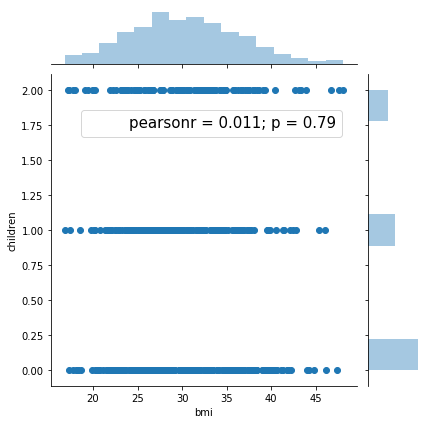

In [59]:
#Null Hypothesis:the distribution of BMI across each group is same
#Alternate Hypothesis:The distribution of BMI across each group is not same

#plot the graph between bmi and children
sp = sns.jointplot(df['bmi'],df['children'])
sp = sp.annotate(pearsonr, fontsize=15, loc=(0.1, 0.8))
plt.show()

In [60]:
#we can see that p_value which is 0.79 
#The distribution of bmi across women with no children,one child and two children is same and we do not reject the Null Hypothesis